In [1]:
import os
import scipy.stats as stat
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors
import matplotlib.cm as cm

In [5]:
data_root = '/kellogg/proj/hpk5609/Mentions/'

In [3]:
top_eth = [
 'SouthernEuropean',
 'WesternNorthernEuropean',
 'EasternEuropean',
 'EastAsian',
 'Chinese',
 'MiddleEastern',
 'Indian',
 'African'
]


ylabels = [
 #'English',
 'Woman',
 'Southern European',
 'Western & Northern Euro.',
 'Eastern European',
 'non-Chinese East Asian',
 'Chinese',
 'Middle Eastern',
 'Indian',
 'African']

cols = ["author_gender_ethneaF"] + ["author_eth_ethnea_broad" + eth for eth in top_eth]

## non-US vs. US (for coefficients)

In [6]:
df_intl = pd.read_csv(data_root + 'reg_results/reg_table/m5_intl_coeff.csv', header=0, index_col='term')
df_intl = df_intl.loc[df_intl.index.isin(cols)]
df_intl = df_intl.reindex(cols)
beta = df_intl['estimate'].values
std = df_intl['std.error'].values

In [7]:
df_us = pd.read_csv(data_root + 'reg_results/reg_table/m5_us_coeff.csv', header=0, index_col='term')
df_us = df_us.loc[df_us.index.isin(cols)]
df_us = df_us.reindex(cols)
beta_us = df_us['estimate'].values
std_us = df_us['std.error'].values

In [8]:
df_intl

,estimate,std.error,statistic,p.value,group
term,,,,,
author_gender_ethneaF,0.012816,0.014705,0.871532,3.834640e-01,fixed
author_eth_ethnea_broadSouthernEuropean,-0.328367,0.020881,-15.725379,1.013423e-55,fixed
author_eth_ethnea_broadWesternNorthernEuropean,-0.188026,0.015980,-11.766033,5.840705e-32,fixed
author_eth_ethnea_broadEasternEuropean,-0.239520,0.032122,-7.456455,8.888157e-14,fixed
author_eth_ethnea_broadEastAsian,-0.363237,0.029081,-12.490704,8.390784e-36,fixed
author_eth_ethnea_broadChinese,-0.568335,0.028261,-20.110114,6.018518e-90,fixed
author_eth_ethnea_broadMiddleEastern,-0.108363,0.028871,-3.753358,1.744815e-04,fixed
author_eth_ethnea_broadIndian,-0.162580,0.038716,-4.199314,2.677247e-05,fixed
author_eth_ethnea_broadAfrican,-0.519994,0.084795,-6.132340,8.659565e-10,fixed


In [9]:
df_us

,estimate,std.error,statistic,p.value,group
term,,,,,
author_gender_ethneaF,-0.008241,0.011191,-0.736377,4.615011e-01,fixed
author_eth_ethnea_broadSouthernEuropean,-0.019732,0.017565,-1.123360,2.612848e-01,fixed
author_eth_ethnea_broadWesternNorthernEuropean,-0.021531,0.014234,-1.512626,1.303748e-01,fixed
author_eth_ethnea_broadEasternEuropean,0.120110,0.027614,4.349607,1.363820e-05,fixed
author_eth_ethnea_broadEastAsian,-0.239399,0.029112,-8.223255,1.980536e-16,fixed
author_eth_ethnea_broadChinese,-0.305035,0.020310,-15.018733,5.535569e-51,fixed
author_eth_ethnea_broadMiddleEastern,0.070306,0.022239,3.161446,1.569880e-03,fixed
author_eth_ethnea_broadIndian,0.044232,0.022536,1.962707,4.968028e-02,fixed
author_eth_ethnea_broadAfrican,-0.289363,0.067674,-4.275861,1.903998e-05,fixed


In [10]:
zs = (beta - beta_us) / np.sqrt(np.square(std) + np.square(std_us))

In [11]:
p_values = stat.norm.sf(abs(zs)) * 2 # two sided

In [12]:
p_values

array([2.54499455e-01, 1.15927831e-29, 7.25515280e-15, 2.06980624e-17,
       2.61662762e-03, 3.86101948e-14, 9.45230951e-07, 3.90043259e-06,
       3.35167301e-02])

In [13]:
df_intl.loc['author_gender_ethneaF']['estimate']

0.0128155313753725

In [14]:
np.round(df_intl.loc['author_gender_ethneaF']['estimate'], 2)

0.01

In [15]:
def get_p_sym(val):
    if val < 0.001:
        return '\sym{***}'
    elif val < 0.01:
        return '\sym{**}'
    elif val < 0.05:
        return '\sym{*}'
    else:
        return ''

for col, pval in zip(cols, p_values):
    sym = get_p_sym(df_intl.loc[col]['p.value'])
    sym_us = get_p_sym(df_us.loc[col]['p.value'])
    print('%s &\t%.2f%s &\t%.2f%s &\t%.3f \\\\'%(col, df_us.loc[col]['estimate'], sym_us, df_intl.loc[col]['estimate'], sym, pval))

author_gender_ethneaF &	-0.01 &	0.01 &	0.254 \\
author_eth_ethnea_broadSouthernEuropean &	-0.02 &	-0.33\sym{***} &	0.000 \\
author_eth_ethnea_broadWesternNorthernEuropean &	-0.02 &	-0.19\sym{***} &	0.000 \\
author_eth_ethnea_broadEasternEuropean &	0.12\sym{***} &	-0.24\sym{***} &	0.000 \\
author_eth_ethnea_broadEastAsian &	-0.24\sym{***} &	-0.36\sym{***} &	0.003 \\
author_eth_ethnea_broadChinese &	-0.31\sym{***} &	-0.57\sym{***} &	0.000 \\
author_eth_ethnea_broadMiddleEastern &	0.07\sym{**} &	-0.11\sym{***} &	0.000 \\
author_eth_ethnea_broadIndian &	0.04\sym{*} &	-0.16\sym{***} &	0.000 \\
author_eth_ethnea_broadAfrican &	-0.29\sym{***} &	-0.52\sym{***} &	0.034 \\


## Full data

### Fig 1 - mention

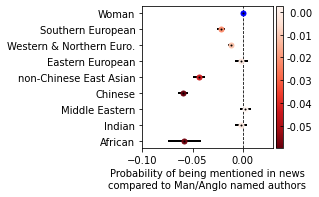

In [22]:
nrows = 1
ncols = 1
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(4.5, 2.5))

s = 4 # markersize
lw = 1.5 # linewidth


df = pd.read_csv(data_root + 'reg_results/reg_table/big_mfx_table_R_margins.csv', header=0, index_col='factor')
df = df.loc[df.index.isin(cols)]
df = df.reindex(cols)
xs = df['AME'].values
confs = (df['upper'] - df['AME']).values

norm = matplotlib.colors.Normalize(vmin=min(xs), vmax=max(xs))
mapper = cm.ScalarMappable(norm=norm, cmap='Reds_r')
xcols = np.array([(mapper.to_rgba(v)) for v in xs])

# ax.errorbar(xs[::-1], ylabels[::-1], xerr=confs[::-1], fmt='bo', markersize=s, linewidth=lw, fillstyle='full')
ax.errorbar(xs[::-1], ylabels[::-1], xerr=confs[::-1], color='k', fmt='.', markersize=2, linewidth=2)
ax.axvline(0, color='k', linestyle='--', linewidth = 0.8)

for x, ylab, coll in zip(xs, ylabels, xcols):
    if ylab == 'Woman':
        ax.plot([x], [ylab], color='b', marker='o', markersize=5)
    else:
        ax.plot([x], [ylab], color=coll, marker='o', markersize=5)

ax.set_xlim([-0.10, 0.03])

cbar = fig.colorbar(mapper, ax=ax, fraction=0.2, pad=0.02)#, format="%0.2f")
# cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom")
cbar.ax.tick_params(axis='y', direction='in')
# cbar.ax.set_xlim(-0.05, 0)
cbar.set_ticks([-0.05, -0.04, -0.03, -0.02, -0.01, 0])
cbar.set_ticklabels(['-0.05', '-0.04', '-0.03', '-0.02', '-0.01', ' 0.00'])

fig.text(0.65, -0.02,'Probability of being mentioned in news\ncompared to Man/Anglo named authors', ha='center', va='center')
plt.tight_layout()
plt.subplots_adjust(wspace=0)
plt.show()
fig.savefig(data_root+'fig_one_mention_full.pdf', bbox_inches='tight', pad_inches=0.02)


In [66]:
xs

array([ 0.00055229, -0.02203022, -0.01157867, -0.00147697, -0.04335681,
       -0.05972311,  0.00250235, -0.00178691, -0.05812888])

In [67]:
xs_abs_diff = xs.copy() # xs_abs_diff for later use

In [68]:
ylabels

['Female',
 'Southern European',
 'Western & Northern Euro.',
 'Eastern European',
 'non-Chinese East Asian',
 'Chinese',
 'Middle Eastern',
 'Indian',
 'African']

In [69]:
reg_data = pd.read_csv(data_root+"reg_data_plot.csv", header=0)

In [70]:
total_non_eng = 0
would_be = 0
for x, eth in zip(xs[1:], top_eth):
    size = np.sum(reg_data.author_eth_ethnea_broad == eth)
    would_be_named_if_were_eng = x*size*-1
    total_non_eng += size
    would_be += would_be_named_if_were_eng
    print(eth, '\t', would_be_named_if_were_eng)

SouthernEuropean 	 1126.4930411383464
WesternNorthernEuropean 	 1231.1716956725122
EasternEuropean 	 25.479142930628633
EastAsian 	 826.7276898309004
Chinese 	 2570.423108351086
MiddleEastern 	 -65.26633568452748
Indian 	 38.08612765412244
African 	 161.24951609777693


In [71]:
would_be

5914.363985990845

In [72]:
total_non_eng

286993

## US institution subset

### Fig 2 - A big plot

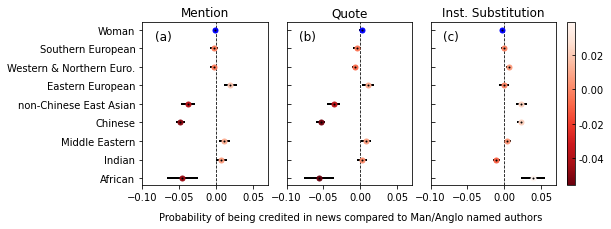

In [24]:
cates = [
    'reg_table/big_mfx_table_R_margins_us_subset.csv',
    'quote/margins_us_subset.csv',
    'indirect/margins_us_subset.csv'
]
re_cates = [
    'Mention',
    'Quote',
    'Inst. Substitution'
]

subs = ['(a)', '(b)', '(c)']


nrows = 1
ncols = 3
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(9.5, 3), sharex=True)

s = 4 # markersize
lw = 1.5 # linewidth

all_xs = []
for cate in cates:    
    df = pd.read_csv(data_root + 'reg_results/%s'%cate, header=0, index_col='factor')
    df = df.loc[df.index.isin(cols)]
    df = df.reindex(cols)
    xs = df['AME'].values
    all_xs.extend(xs)
all_xs = np.array(all_xs)
norm = matplotlib.colors.Normalize(vmin=min(all_xs), vmax=max(all_xs))
mapper = cm.ScalarMappable(norm=norm, cmap='Reds_r')

for pos, cate in enumerate(cates):
    j = pos%ncols
    ax = axes[j]
    df = pd.read_csv(data_root + 'reg_results/%s'%cate, header=0, index_col='factor')
    df = df.loc[df.index.isin(cols)]
    df = df.reindex(cols)
    xs = df['AME'].values
    confs = (df['upper'] - df['AME']).values
    
    # ax.errorbar(xs[::-1], ylabels[::-1], xerr=confs[::-1], fmt='bo', markersize=s, linewidth=lw, fillstyle='full')
    ax.errorbar(xs[::-1], ylabels[::-1], xerr=confs[::-1], color='k', fmt='.', markersize=2, linewidth=2)
    ax.axvline(0, color='k', linestyle='--', linewidth = 0.8)
    ax.set_title(re_cates[pos])
    ax.text(0.1, 0.95, subs[pos], fontsize=12, ha='left', va='top', transform=ax.transAxes)
    if j != 0:
        ax.set_yticklabels([])
        ax.tick_params(axis='y', direction='in')
        
    # draw dots
    xcols = np.array([(mapper.to_rgba(v)) for v in xs])
    for x, ylab, coll in zip(xs, ylabels, xcols):
        if ylab == 'Woman':
            ax.plot([x], [ylab], color='b', marker='o', markersize=5)
        else:
            ax.plot([x], [ylab], color=coll, marker='o', markersize=5)

fig.subplots_adjust(wspace=0.15)

cbar = fig.colorbar(mapper, ax=axes.ravel().tolist(), fraction=0.2, pad=0.02)#, format="%0.2f")
# cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom")
cbar.ax.tick_params(axis='y', direction='in')
# cbar.ax.set_xlim(-0.05, 0)
cbar.set_ticks([-0.04, -0.02, 0, 0.02])
cbar.set_ticklabels(['-0.04', '-0.02', ' 0.00', ' 0.02'])

plt.xlim([-0.1, 0.07])
fig.text(0.43, -0.02, 'Probability of being credited in news compared to Man/Anglo named authors', ha='center', va='center')
plt.show()
fig.savefig(data_root+'three_ame_us.pdf', bbox_inches='tight', pad_inches=0.01)

### SI version of Fig 2 - Using full data

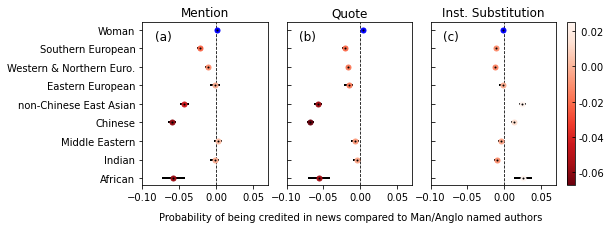

In [23]:
cates = [
    'reg_table/big_mfx_table_R_margins.csv',
    'quote/margins.csv',
    'indirect/margins.csv'
]
re_cates = [
    'Mention',
    'Quote',
    'Inst. Substitution'
]
subs = ['(a)', '(b)', '(c)']

nrows = 1
ncols = 3
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(9.5, 3), sharex=True)

s = 4 # markersize
lw = 1.5 # linewidth

all_xs = []
for cate in cates:  
    df = pd.read_csv(data_root + 'reg_results/%s'%cate, header=0, index_col='factor')
    df = df.loc[df.index.isin(cols)]
    df = df.reindex(cols)
    xs = df['AME'].values
    all_xs.extend(xs)
all_xs = np.array(all_xs)
norm = matplotlib.colors.Normalize(vmin=min(all_xs), vmax=max(all_xs))
# use reversed color bar by adding '_r'
mapper = cm.ScalarMappable(norm=norm, cmap='Reds_r')

for pos, cate in enumerate(cates):
    j = pos%ncols
    ax = axes[j]
    df = pd.read_csv(data_root + 'reg_results/%s'%cate, header=0, index_col='factor')
    df = df.loc[df.index.isin(cols)]
    df = df.reindex(cols)
    xs = df['AME'].values
    confs = (df['upper'] - df['AME']).values
    
    # ax.errorbar(xs[::-1], ylabels[::-1], xerr=confs[::-1], fmt='bo', markersize=s, linewidth=lw, fillstyle='full')
    ax.errorbar(xs[::-1], ylabels[::-1], xerr=confs[::-1], color='k', fmt='.', markersize=2, linewidth=2)
    ax.axvline(0, color='k', linestyle='--', linewidth = 0.8)
    ax.set_title(re_cates[pos])
    ax.text(0.1, 0.95, subs[pos], fontsize=12, ha='left', va='top', transform=ax.transAxes)
    if j != 0:
        ax.set_yticklabels([])
        ax.tick_params(axis='y', direction='in')
        
    # draw dots
    xcols = np.array([(mapper.to_rgba(v)) for v in xs])
    for x, ylab, coll in zip(xs, ylabels, xcols):
        if ylab == 'Woman':
            ax.plot([x], [ylab], color='b', marker='o', markersize=5)
        else:
            ax.plot([x], [ylab], color=coll, marker='o', markersize=5)

# plt.tight_layout()
fig.subplots_adjust(wspace=0.15)

cbar = fig.colorbar(mapper, ax=axes.ravel().tolist(), fraction=0.2, pad=0.02)#, format="%0.2f")
# cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom")
cbar.ax.tick_params(axis='y', direction='in')
# cbar.ax.set_xlim(-0.05, 0)
cbar.set_ticks([-0.06, -0.04, -0.02, 0, 0.02])
cbar.set_ticklabels(['-0.06', '-0.04', '-0.02', ' 0.00', ' 0.02'])

plt.xlim([-0.1, 0.07])
fig.text(0.43, -0.02, 'Probability of being credited in news compared to Man/Anglo named authors', ha='center', va='center')
plt.show()
fig.savefig(data_root+'three_ame_full.pdf', bbox_inches='tight', pad_inches=0.01)